## CAPM

Expected return of stock -- using the expected market return, its $cov[r_s,r_m]$ and risk free rate.
$E[r_s]-r_f =\beta_s (E[r_m]-r_f) $

Find $cov[r_s,r_m]$ using linear regression ($\alpha=0$ and $\beta=cov[r_S,r_m]/var[r_m]$) of $r'_s$ on $r'_m$ ($r'$ daily excess return). 

Risk free rate is not a given quantity. We have to use proxies for it.
* The return on domestically held short-dated government bonds is normally perceived as a good proxy for the risk-free rate.
* In business valuation the long-term yield on the US Treasury coupon bonds is generally accepted as the risk-free rate of return.


#### $\alpha$ of stock
Zero according to CAPM. If $\neq 0 $ Excess return by stock-- when adjusted for $r_m$ and $r_f$.
 
#### $\beta$ of stock
$\beta=1$: stock in line with the market. Volatility/covariance wrt market.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# set date 'YYYY-MM-DD'
start_date="2017-01-01"
end_date="2020-04-30"

# getting data

# let's take Apple as asset and SP500  as market
# risk free interest rate as 13 week US treasury bond yield

data=yf.download(['AAPL','^GSPC','^IRX'], start=start_date, end=end_date)
data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                          Close                      \
                 AAPL        ^GSPC   ^IRX       AAPL        ^GSPC   ^IRX   
Date                                                                       
2017-01-03  27.257648  2257.830078  0.475  29.037500  2257.830078  0.475   
2017-01-04  27.227133  2270.750000  0.518  29.004999  2270.750000  0.518   
2017-01-05  27.365595  2269.000000  0.508  29.152500  2269.000000  0.508   
2017-01-06  27.670677  2276.979980  0.503  29.477501  2276.979980  0.503   
2017-01-09  27.924122  2268.899902  0.485  29.747499  2268.899902  0.485   

                 High                            Low                      \
                 AAPL        ^GSPC   ^IRX       AAPL        ^GSPC   ^IRX   
Date                                                                       
2017-01-03  29.082500  2263.879883  0.490  28.690001  2245.129883  0.475   
2017-01-04  29.127501  2272.820068  0.520  28.937500  2261.600098  0.518   
2017-01-05  29.215000  2271.500000  0.510  28.952499  2260.449951  0.503   
2017-01-06  29.540001  2282.100098  0.508  29.117500  2264.060059  0.500   
2017-01-09  29.857500  2275.489990  0.500  29.485001  2268.899902  0.483   

                 Open                         Volume                   
                 AAPL        ^GSPC   ^IRX       AAPL       ^GSPC ^IRX  
Date                                                                   
2017-01-03  28.950001  2251.570068  0.488  115127600  3770530000  0.0  
2017-01-04  28.962500  2261.600098  0.518   84472400  3764890000  0.0  
2017-01-05  28.980000  2268.179932  0.510   88774400  3761820000  0.0  
2017-01-06  29.195000  2271.139893  0.503  127007600  3339890000  0.0  
2017-01-09  29.487499  2273.590088  0.500  134247600  3217610000  0.0

In [3]:
data.shape

(836, 18)

In [4]:
data.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close', '^GSPC'),
            ('Adj Close',  '^IRX'),
            (    'Close',  'AAPL'),
            (    'Close', '^GSPC'),
            (    'Close',  '^IRX'),
            (     'High',  'AAPL'),
            (     'High', '^GSPC'),
            (     'High',  '^IRX'),
            (      'Low',  'AAPL'),
            (      'Low', '^GSPC'),
            (      'Low',  '^IRX'),
            (     'Open',  'AAPL'),
            (     'Open', '^GSPC'),
            (     'Open',  '^IRX'),
            (   'Volume',  'AAPL'),
            (   'Volume', '^GSPC'),
            (   'Volume',  '^IRX')],
           )

In [5]:
# NA values
data.isna().sum()

Adj Close  AAPL     0
           ^GSPC    0
           ^IRX     5
Close      AAPL     0
           ^GSPC    0
           ^IRX     5
High       AAPL     0
           ^GSPC    0
           ^IRX     5
Low        AAPL     0
           ^GSPC    0
           ^IRX     5
Open       AAPL     0
           ^GSPC    0
           ^IRX     5
Volume     AAPL     0
           ^GSPC    0
           ^IRX     5
dtype: int64

In [6]:
# rows with missing values
n=data.isna().any(axis=1) # checks if any col (i.e. axis=1) has Nan value wrt each row
data[n==True]

Adj Close                        Close                    \
                 AAPL        ^GSPC ^IRX       AAPL        ^GSPC ^IRX   
Date                                                                   
2017-10-04  36.466217  2537.739990  NaN  38.369999  2537.739990  NaN   
2017-10-18  37.958321  2561.260010  NaN  39.939999  2561.260010  NaN   
2018-11-12  46.994949  2726.219971  NaN  48.542500  2726.219971  NaN   
2019-05-10  48.112705  2881.399902  NaN  49.294998  2881.399902  NaN   
2019-10-30  59.581932  3046.770020  NaN  60.814999  3046.770020  NaN   

                 High                          Low                    \
                 AAPL        ^GSPC ^IRX       AAPL        ^GSPC ^IRX   
Date                                                                   
2017-10-04  38.465000  2540.530029  NaN  38.115002  2531.800049  NaN   
2017-10-18  40.177502  2564.110107  NaN  39.900002  2559.669922  NaN   
2018-11-12  49.962502  2775.989990  NaN  48.447498  2722.000000  NaN   
2019-05-10  49.712502  2891.310059  NaN  48.192501  2825.389893  NaN   
2019-10-30  61.325001  3050.100098  NaN  60.302502  3025.959961  NaN   

                 Open                       Volume                   
                 AAPL        ^GSPC ^IRX       AAPL       ^GSPC ^IRX  
Date                                                                 
2017-10-04  38.407501  2533.479980  NaN   80655200  3017120000  NaN  
2017-10-18  40.105000  2562.870117  NaN   65496800  2998090000  NaN  
2018-11-12  49.750000  2773.929932  NaN  204542000  3670930000  NaN  
2019-05-10  49.355000  2863.100098  NaN  164834800  3529600000  NaN  
2019-10-30  61.189999  3039.739990  NaN  124522000  3776030000  NaN

In [7]:
# filling the Nans with values in the next row (ffill)
# can use dropna, or backfill
data=data.fillna(method='ffill')

In [8]:
data['Adj Close'][['AAPL']].head()# acess multi index column


,AAPL
Date,
2017-01-03,27.257648
2017-01-04,27.227133
2017-01-05,27.365595
2017-01-06,27.670677
2017-01-09,27.924122


In [9]:
# days between each date, useful for converting annual rate to daily interest rate
days=data.index.to_series().diff().dt.days.dropna()
days

Date
2017-01-04    1.0
2017-01-05    1.0
2017-01-06    1.0
2017-01-09    3.0
2017-01-10    1.0
             ... 
2020-04-23    1.0
2020-04-24    1.0
2020-04-27    3.0
2020-04-28    1.0
2020-04-29    1.0
Name: Date, Length: 835, dtype: float64

**days:** gives wrt the date in index, the days since the last time market was open.

The return on stock is also- what has happened to the money invested yesterday, increased or decreased.

So, **risk free rate** to consider/substract from stock-return today-- is that of yestereday. As 1 invested yesterday at r of yesterday, is (1+r) i.e. the return 1+r-1= r today.

#### Formula annual to daily risk free rate

Annual rate= $r$, generally on $360 ~days$.


Daily risk free rate (rough, assuming continuous)= $r/360$, 
hence, 
daily risk free return(approx.)= $r/360$ $*$ $days~elapsed$

daily risk free rate (another approx.)=$exp(r d/360)-1$

daily risk free rate (better approx., assumes discrete)=$(1+r)^\frac{d}{360}-1$

daily risk free rate (approx.)=$log(1+rd/360)$

Choose any.


In [10]:
# compute daily log returns-- use adjusted close price (adjusted for corporate action- dividend etc)
d_log_ret=np.log(data['Adj Close'][['AAPL','^GSPC']]).diff().dropna()
d_log_ret.head()

# annual risk free rate (take one shifted i.e. to find risk free return today use r of yesterday)
r=data['Adj Close'][['^IRX']].shift(1).dropna()


# daily
r_d=np.log(1+0.01*r['^IRX'].mul(days,axis=0)/360)


# compute excess returns
ex_ret=d_log_ret.sub(r_d,axis=0)


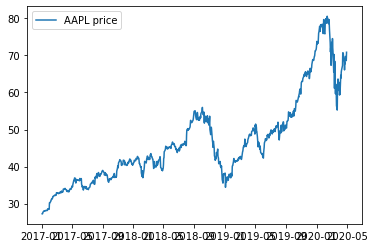

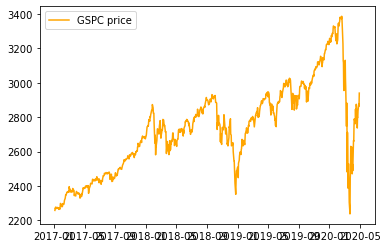

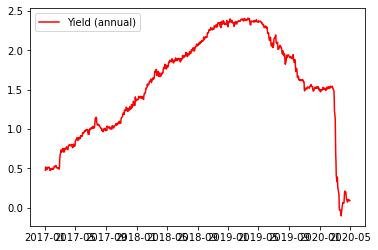

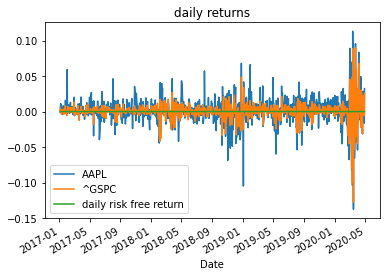

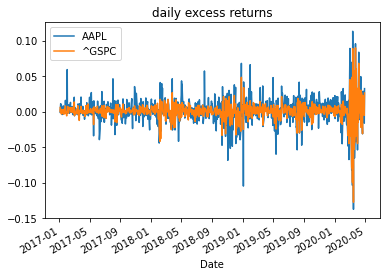

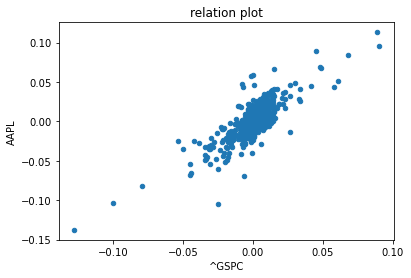

In [11]:

# plot values of all wrt time
plt.plot(data['Adj Close']['AAPL'],label='AAPL price')
plt.legend()
plt.show()
plt.plot(data['Adj Close']['^GSPC'],label='GSPC price',color='orange')
plt.legend()
plt.show()
plt.plot(data['Adj Close']['^IRX'],label='Yield (annual)',color='red')
plt.legend()
plt.show()

# plot returns/log-daily-returns for all
d_log_ret.plot()
r_d.plot(label='daily risk free return')
plt.legend()
plt.title('daily returns')
plt.show()

# plot excess returns wrt time
ex_ret.plot()
plt.title('daily excess returns')
plt.show()

# plot excess return wrt each other
ex_ret.plot.scatter('^GSPC','AAPL')
plt.title('relation plot')
plt.show()


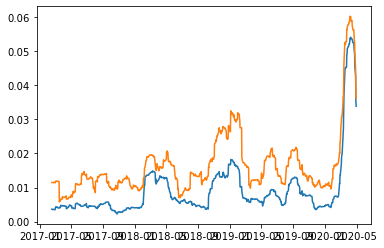

In [34]:
# variance
plt.plot(ex_ret['^GSPC'].rolling(30).std().dropna())
plt.plot(ex_ret['AAPL'].rolling(30).std().dropna())

In [12]:
# fit lm
from sklearn.linear_model import LinearRegression as LR

lr=LR()
lr.fit(ex_ret[['^GSPC']],ex_ret[['AAPL']]) # use this for prediction

# LR and OLS give same fit, can check using lr.coef_,lr.intercept_
    
# see summary
# see summary using statsmodel
import statsmodels.api as sm
from statsmodels.api import OLS

X=sm.add_constant(ex_ret[['^GSPC']])
Y=ex_ret[['AAPL']]
ols=OLS(Y,X)
fit_ols=ols.fit() # use this for diagnostics
fit_ols.summary()

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1553.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.56e-192
Time:                        07:17:52   Log-Likelihood:                 2553.4
No. Observations:                 835   AIC:                            -5103.
Df Residuals:                     833   BIC:                            -5093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      1.985      0.047    8.68e-06       0.002
^GSPC          1.1821      0.030     39.407      0.000       1.123       1.241
==============================================================================
Omnibus:                      121.096   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.229
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                       9.501   Cond. No.                         76.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference:**
We see that the t-statistic for intercept is barely significant (0.05), significant for GSPC. F-stat is significant i.e. ESS different from RSS, i.e. better model than null. Adj R2 is 0.65. 

**Residuals**: Omnibus/chi2- not normal, from the DW stat- there is no autocorr between residuals, from the JB-test: not normally distributed, kurtosis: very high compared to normal (=3). CN- does not indicate multicoll.

In [13]:
#source: https://www.statsmodels.org/devel/examples/notebooks/generated/linear_regression_diagnostics_plots.html
# to get diagnostic plots as in lm.plot() in R
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


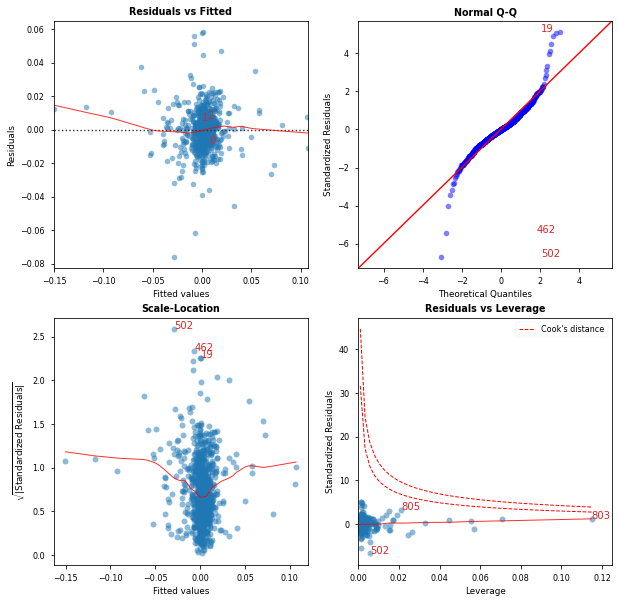

  Features  VIF Factor
1    ^GSPC         1.0
0    const         1.0


In [14]:
# regression diagnostic plots

diag_plots=Linear_Reg_Diagnostic(fit_ols)
fig,ax=diag_plots()

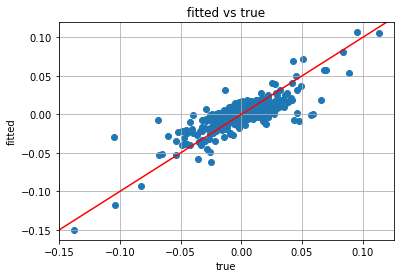

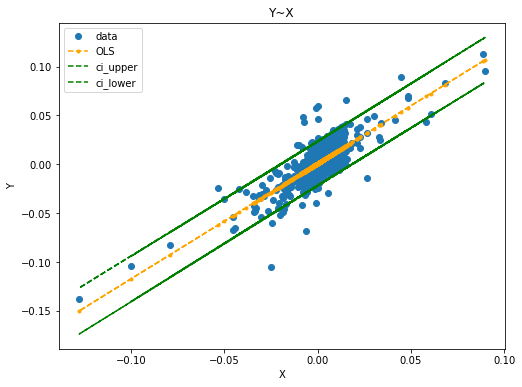

In [15]:
# y~y_pred
plt.scatter(Y,fit_ols.predict())
plt.axline((0,0),slope=1,color='red')
plt.title('fitted vs true')
plt.xlabel('true')
plt.ylabel('fitted')
plt.grid()
plt.show()

# y~x  with confidence interval (prediction)
pred_ols = fit_ols.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

x=ex_ret[['^GSPC']]

ax.plot(x, Y, "o", label="data")
ax.plot(x, fit_ols.fittedvalues, "--.",color='orange', label="OLS")
ax.plot(x, iv_u, "g--",label='ci_upper')
ax.plot(x, iv_l, "g--",label='ci_lower')
ax.legend(loc="best")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y~X')
plt.show()



In [16]:
# give coef_beta as the output(with confidence interval)
display(fit_ols.params)
fit_ols.conf_int(alpha=0.05)

const    0.000782
^GSPC    1.182086
dtype: float64

,0,1
const,0.000009,0.001555
^GSPC,1.123207,1.240965


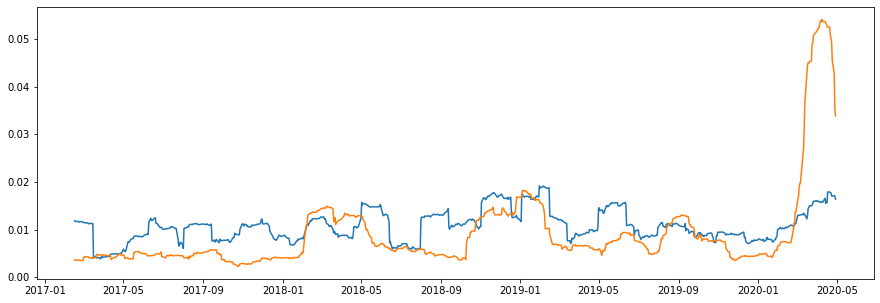

In [39]:
plt.figure(figsize=(15,5))
plt.plot(fit_ols.resid.rolling(30).std().dropna())
plt.plot(ex_ret['^GSPC'].rolling(30).std().dropna())

## Adding Macroeconomic factors to $r_m$ (market)

Some macroeconomic factors are- commodityprices(oil, gold etc.), interest rates,economicgrowth(GDP), FX rates.



In [17]:
# import economic factor

In [18]:
# fix dates

# compute daily log returns

# compute excess returns

In [19]:
# plot excess returns wrt time

# plot excess return wrt each other

In [20]:
# fit lm

# see summary

In [21]:
# regression diagnostics and inferences

In [22]:
# compare models to see if contribution of economic factor is stat significant

In [23]:
# give coefs_beta as the output